In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd

In [2]:
def base_N_hamming_distance(i: int, j: int, N: int) -> int:
    arr_i = np.array([int(s) for s in bin(i)[2:].zfill(N)])
    arr_j = np.array([int(s) for s in bin(j)[2:].zfill(N)])
    return int(np.sum(arr_i != arr_j))

def overlap_distribution_fair_from_hd_list(hd_list,degeneracy, N) -> np.ndarray:
    overlap_dist = np.zeros(N + 1)
    overlap_dist[-1] = 1 / degeneracy
    for hd in hd_list:
        overlap_dist[-hd - 1] += 2 / (degeneracy**2)
    return overlap_dist



def random_large_N_hamming_matrix(N: int):
    

    overlap = random.randint(0,N - 1)

    hd_1 = random.randint(overlap, (N+overlap)//2)

    hd_2 = N + overlap - hd_1

    hd_3 = hd_1 + hd_2 - 2*overlap

    # print(overlap)

    return  [hd_1, hd_2, hd_3]


# [50, 20, 30] N = 50
# N = h1 + h2 - overlap
# h1 + h2 = N + overlap
# h1 -> (1,(N+overlap)/2) for h2 >= h1
# 

    

def flip_spins(initial_state:int, spins_to_flip:list) -> int:
    flipped_state = initial_state
    for spin in spins_to_flip:
        flipped_state ^= (2**spin)
    return flipped_state

    

In [3]:
od_var_list = []
N_list = []
system_size = 100
for N in range(4,system_size):

    od_var_list_i = []
    for i in range(1000):

        hd_list = random_large_N_hamming_matrix(N)

        od = overlap_distribution_fair_from_hd_list(hd_list,3, system_size)
        od_bins = np.array([((2 * i) / system_size) - 1 for i in range(system_size + 1)])

        od_mean = np.sum(od_bins * od)
        od_var = np.sum(od * (od_bins - od_mean) ** 2)
        od_var_list_i.append(od_var)

    N_list.append(N)
    od_var_list.append(np.mean(od_var_list_i))


    # print(hd_list)
    # print(od)
    # print(od_bins)
    # print(od_mean)
    # print(od_var)



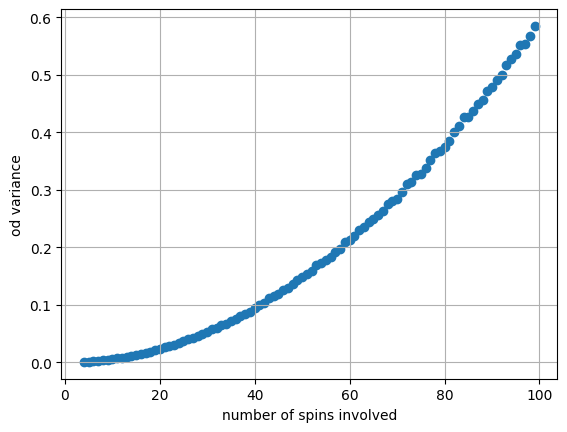

In [4]:
# Plot x vs y
plt.scatter(N_list, od_var_list, marker='o')  # Optional: add marker and line style
plt.xlabel('number of spins involved')  # Label for the x-axis
plt.ylabel('od variance')  # Label for the y-axis
plt.grid(True)  # Optional: adds grid
plt.show()  # Display the plot



# [,,1/2,,, 1/2]


In [5]:
N = 100
M = 2**N
num_samples = 100
degen_range = [3,10]


data_list = []

for degeneracy in range(degen_range[0], degen_range[1]):
    for _ in range(num_samples):



        gs_array = set()
        while len(gs_array) < degeneracy:
            gs_array.add(random.randint(0,M - 1))
        gs_array = list(gs_array)



        
        hd_array = []
        spins_involved = 0
        for gs_i in range(degeneracy):
            for gs_j in range(gs_i + 1,degeneracy):
                binary_diff = gs_array[gs_i]^gs_array[gs_j]
                hd_array.append(binary_diff.bit_count())
                spins_involved |= binary_diff

        od = overlap_distribution_fair_from_hd_list(hd_array,degeneracy, N)
        od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
        od_mean = np.sum(od_bins * od)
        od_var = np.sum(od * (od_bins - od_mean) ** 2)


        data_list.append([spins_involved.bit_count(), od_var, degeneracy])



data_list = data_list
        


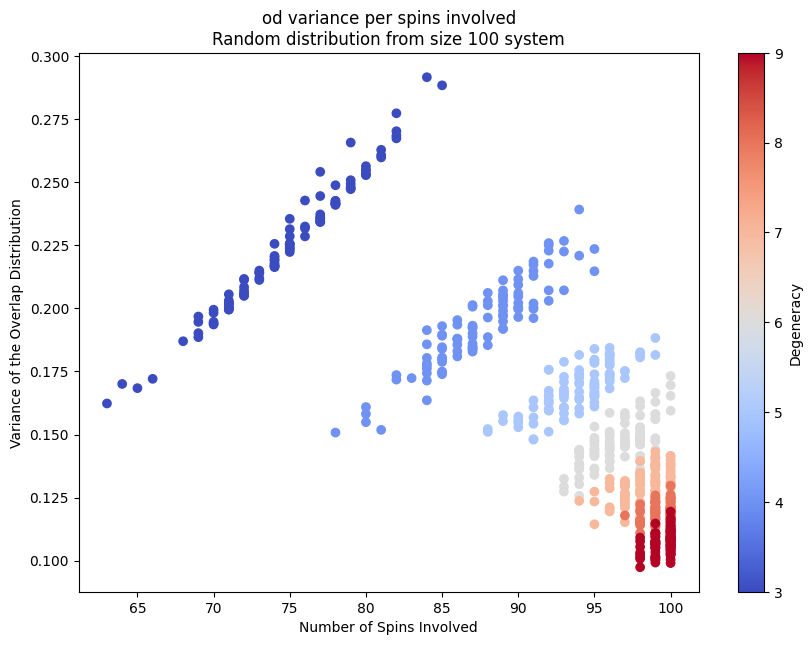

In [6]:
plot_data = np.array(data_list).T

spins_involved = plot_data[0]
od_vars = plot_data[1]
degeneracies = plot_data[2]


cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)
plt.figure(figsize=(10,7))

plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)

plt.xlabel("Number of Spins Involved")
plt.ylabel("Variance of the Overlap Distribution")
plt.title(f"od variance per spins involved\nRandom distribution from size {N} system")

plt.colorbar(label='Degeneracy')


plt.show()


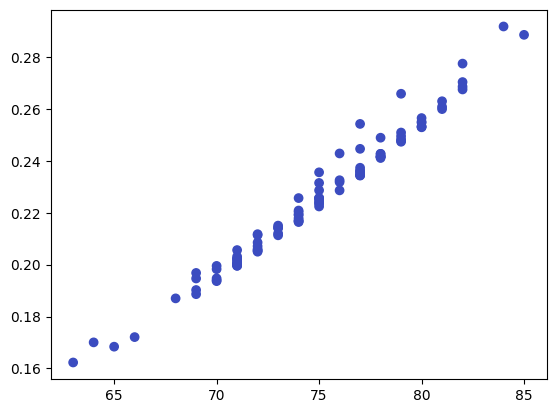

In [7]:
chosen_degeneracy = 3

plot_data = np.array([d for d in data_list if d[2] == chosen_degeneracy]).T

spins_involved = plot_data[0]
od_vars = plot_data[1]
degeneracies = plot_data[2]


cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)


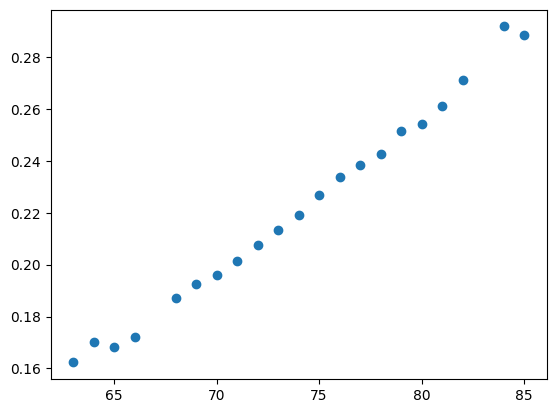

In [8]:


df = pd.DataFrame(data_list, columns=['si', 'odv', 'deg'])

plot_df = df[df['deg'] == 3].groupby('si')['odv'].mean().reset_index()

plt.scatter(x=plot_df['si'], y =plot_df['odv'])



# print(avg_y_per_x)


# plot_data = np.array(data_list).T

# spins_involved = plot_data[0]
# od_vars = plot_data[1]
# degeneracies = plot_data[2]


# cmap = plt.cm.coolwarm
# norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


# plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)


plt.show()



In [9]:
od_var_list = []
N_list = []
system_size = 100
for N in range(20,system_size):

    for i in range(100):

        hd_list = random_large_N_hamming_matrix(N)

        od = overlap_distribution_fair_from_hd_list(hd_list,3, system_size)
        od_bins = np.array([((2 * i) / system_size) - 1 for i in range(system_size + 1)])

        od_mean = np.sum(od_bins * od)
        od_var = np.sum(od * (od_bins - od_mean) ** 2)

        N_list.append(N)
        od_var_list.append(od_var)





    # print(hd_list)
    # print(od)
    # print(od_bins)
    # print(od_mean)
    # print(od_var)


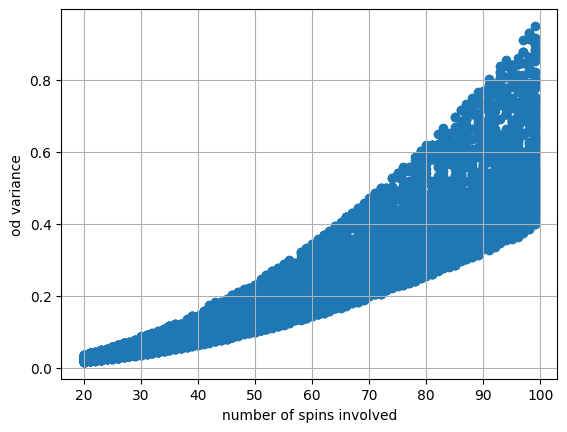

In [10]:
# Plot x vs y
plt.scatter(N_list, od_var_list, marker='o')  # Optional: add marker and line style
plt.xlabel('number of spins involved')  # Label for the x-axis
plt.ylabel('od variance')  # Label for the y-axis
plt.grid(True)  # Optional: adds grid
plt.show()  # Display the plot

In [11]:
# Forced even distribution

N = 100
M = 2**N
num_samples = 100
degen_range = [2,15]


data_list_ghz = []

for degeneracy in range(degen_range[0], degen_range[1]):
    for max_hd in range(int(np.ceil(np.log2(degeneracy))),N+1):
        for _ in range(num_samples):

            
            # # flip random num <= N spins  
            # gs_set = {0}
            # next_gs_list = list(bin(0)[2:].zfill(N))
            # for i in range(max_hd):
            #     next_gs_list[i] = '0' if next_gs_list[i] == '1' else '1'
            # next_gs = int("".join(next_gs_list), 2)
            # gs_set.add(next_gs)
            # last_gs = next_gs

            # while len(gs_set) < degeneracy:
            #     next_gs_list = list(bin(last_gs)[2:].zfill(N))
            #     for _ in range(max_hd):
            #         i = random.randint(0,N-1)
            #         next_gs_list[i] = '0' if next_gs_list[i] == '1' else '1'
            #     next_gs = int("".join(next_gs_list), 2)
            #     gs_set.add(next_gs)
            #     last_gs = next_gs
            # gs_array = list(gs_set)


            # GHZ
            gs_set = {0,(2**max_hd) - 1}
            while len(gs_set) < degeneracy:
                gs_set.add(random.getrandbits(max_hd))
            gs_array = list(gs_set)





            # W state - flip random i, j then flip j, random k so on... 



            
            hd_array = []
            spins_involved = 0
            for gs_i in range(degeneracy):
                for gs_j in range(gs_i + 1,degeneracy):
                    binary_diff = gs_array[gs_i]^gs_array[gs_j]
                    hd_array.append(binary_diff.bit_count())
                    spins_involved |= binary_diff

            od = overlap_distribution_fair_from_hd_list(hd_array,degeneracy, N)
            od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
            od_mean = np.sum(od_bins * od)
            od_var = np.sum(od * (od_bins - od_mean) ** 2)


            data_list_ghz.append([spins_involved.bit_count(), od_var, degeneracy])



In [12]:
# Forced even distribution

N = 100
M = 2**N
num_samples = 100
degen_range = [2,15]


data_list_random = []

for degeneracy in range(degen_range[0], degen_range[1]):
    for max_hd in range(int(np.ceil(np.log2(degeneracy))),N+1):
        for _ in range(num_samples):

            
            # flip random num <= N spins  
            gs_set = {0}
            next_gs_list = list(bin(0)[2:].zfill(N))
            for i in range(max_hd):
                next_gs_list[i] = '0' if next_gs_list[i] == '1' else '1'
            next_gs = int("".join(next_gs_list), 2)
            gs_set.add(next_gs)
            last_gs = next_gs

            while len(gs_set) < degeneracy:
                next_gs_list = list(bin(last_gs)[2:].zfill(N))
                for _ in range(max_hd):
                    i = random.randint(0,N-1)
                    next_gs_list[i] = '0' if next_gs_list[i] == '1' else '1'
                next_gs = int("".join(next_gs_list), 2)
                gs_set.add(next_gs)
                last_gs = next_gs
            gs_array = list(gs_set)


            # # GHZ
            # gs_set = {0,(2**max_hd) - 1}
            # while len(gs_set) < degeneracy:
            #     gs_set.add(random.getrandbits(max_hd))
            # gs_array = list(gs_set)





            # W state - flip random i, j then flip j, random k so on... 



            
            hd_array = []
            spins_involved = 0
            for gs_i in range(degeneracy):
                for gs_j in range(gs_i + 1,degeneracy):
                    binary_diff = gs_array[gs_i]^gs_array[gs_j]
                    hd_array.append(binary_diff.bit_count())
                    spins_involved |= binary_diff

            od = overlap_distribution_fair_from_hd_list(hd_array,degeneracy, N)
            od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
            od_mean = np.sum(od_bins * od)
            od_var = np.sum(od * (od_bins - od_mean) ** 2)


            data_list_random.append([spins_involved.bit_count(), od_var, degeneracy])

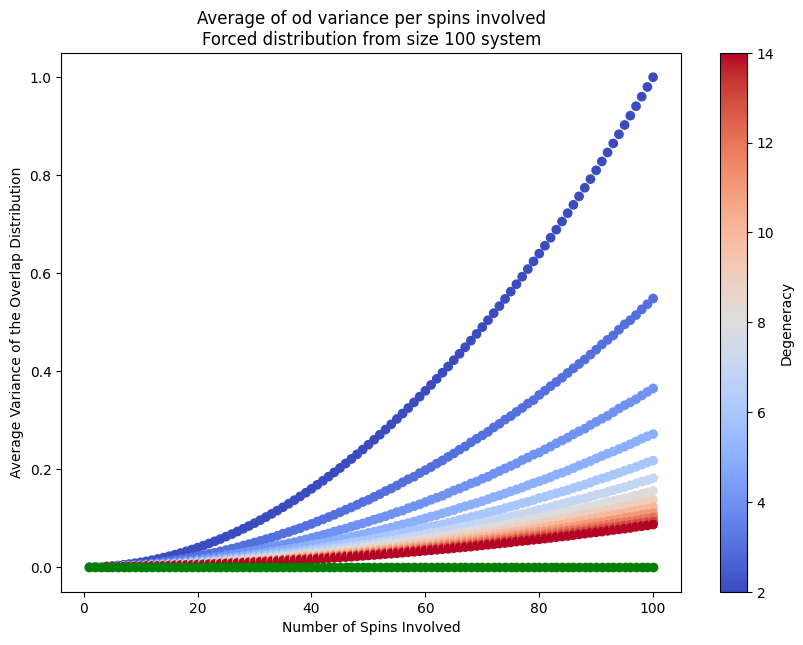

In [14]:


cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


df = pd.DataFrame(data_list_ghz, columns=['si', 'odv', 'deg'])
df_w = pd.DataFrame(data_list_w, columns=['si', 'odv', 'deg'])

plot_df = df.groupby(['si','deg'])['odv'].mean().reset_index()


plt.figure(figsize=(10,7))



plt.scatter(x=plot_df['si'], y=plot_df['odv'], c=plot_df["deg"], cmap=cmap, norm=norm)



plt.xlabel("Number of Spins Involved")
plt.ylabel("Average Variance of the Overlap Distribution")
plt.title(f"Average of od variance per spins involved\nForced distribution from size {N} system")

plt.colorbar(label='Degeneracy')


plt.scatter(x=df_w['si'], y=df_w['odv'], color  ="green")


plt.show()

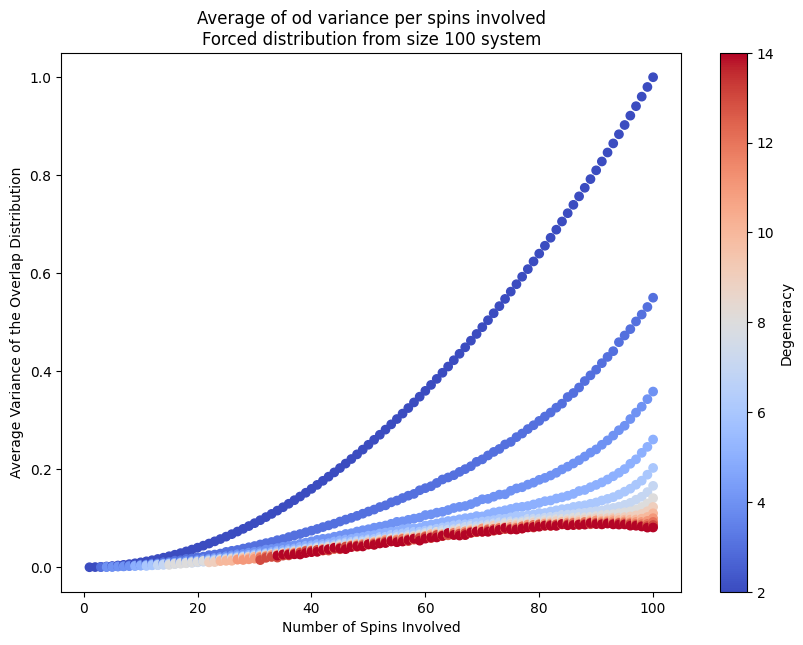

In [86]:
cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


# plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)

df = pd.DataFrame(data_list_random, columns=['si', 'odv', 'deg'])

plot_df = df.groupby(['si','deg'])['odv'].mean().reset_index()


plt.figure(figsize=(10,7))
plt.scatter(x=plot_df['si'], y=plot_df['odv'], c=plot_df["deg"], cmap=cmap, norm=norm)



plt.xlabel("Number of Spins Involved")
plt.ylabel("Average Variance of the Overlap Distribution")
plt.title(f"Average of od variance per spins involved\nForced distribution from size {N} system")

plt.colorbar(label='Degeneracy')

plt.show()

Text(0, 0.5, 'OD varaince')

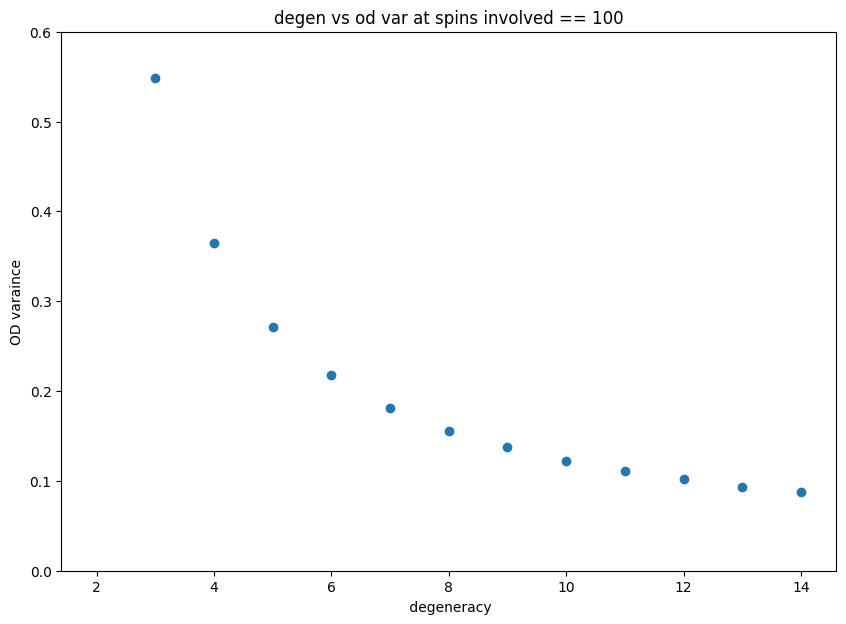

In [16]:
plot_df_1 = df.loc[df["si"] == 100].groupby(['si','deg'])['odv'].mean().reset_index()

plt.figure(figsize=(10,7))
plt.scatter(x=plot_df_1['deg'], y =plot_df_1['odv'])
plt.ylim(0,0.6)
# plt.xscale("log")
plt.title("degen vs od var at spins involved == 100")
plt.xlabel(" degeneracy")
plt.ylabel("OD varaince")


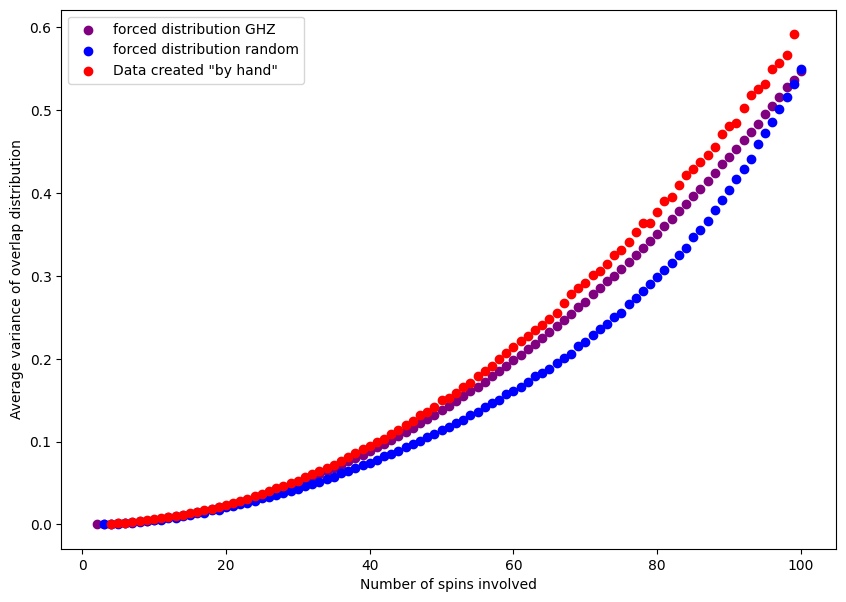

In [90]:
df_ghz = pd.DataFrame(data_list_ghz, columns=['si', 'odv', 'deg'])

plot_df_ghz = df_ghz[df_ghz['deg'] == 3].groupby('si')['odv'].mean().reset_index()


df_random = pd.DataFrame(data_list_random, columns=['si', 'odv', 'deg'])

plot_df_random = df_random[df_random['deg'] == 3].groupby('si')['odv'].mean().reset_index()


plt.figure(figsize=(10,7))
plt.scatter(x=plot_df_ghz['si'], y =plot_df_ghz['odv'], color='purple', label="forced distribution GHZ")
plt.scatter(x=plot_df_random['si'], y =plot_df_random['odv'], color='blue', label="forced distribution random")
plt.scatter(N_list, od_var_list, color = 'red', label='Data created "by hand"')

plt.xlabel("Number of spins involved")
plt.ylabel("Average variance of overlap distribution")

plt.legend()


plt.show()

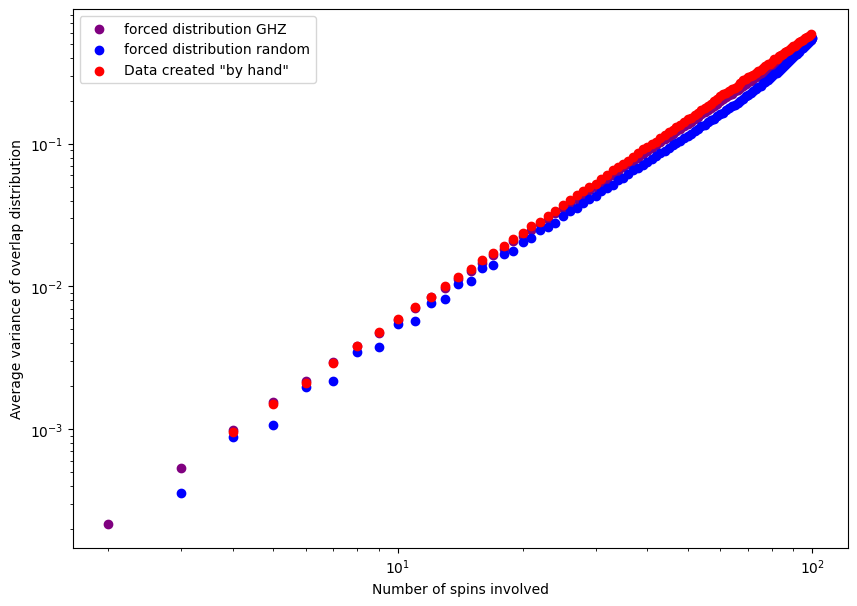

In [121]:
df_ghz = pd.DataFrame(data_list_ghz, columns=['si', 'odv', 'deg'])

plot_df_ghz = df_ghz[df_ghz['deg'] == 3].groupby('si')['odv'].mean().reset_index()


df_random = pd.DataFrame(data_list_random, columns=['si', 'odv', 'deg'])

plot_df_random = df_random[df_random['deg'] == 3].groupby('si')['odv'].mean().reset_index()


plt.figure(figsize=(10,7))
plt.scatter(x=plot_df_ghz['si'], y =plot_df_ghz['odv'], color='purple', label="forced distribution GHZ")
plt.scatter(x=plot_df_random['si'], y =plot_df_random['odv'], color='blue', label="forced distribution random")
plt.scatter(N_list, od_var_list, color = 'red', label='Data created "by hand"')

plt.xlabel("Number of spins involved")
plt.ylabel("Average variance of overlap distribution")

plt.xscale("log")
plt.yscale("log")

plt.legend()


plt.show()

In [78]:
gs_set={0}

last_state = 0
last_spins = [0,random.randint(0,9)]
while(len(gs_set) < 8):
    new_spin = random.sample(list(set(range(10)) - set(last_spins)), 1)
    next_state = flip_spins(last_state,[last_spins[1], new_spin[0]] )
    gs_set.add(next_state)



    last_spins = [last_spins[1], new_spin[0]]
    print(bin(last_state))
    print(last_spins)
    print(bin(next_state))
    last_state = next_state

print([bin(gs) for gs in gs_set])

0b0
[6, 1]
0b1000010
0b1000010
[1, 7]
0b11000000
0b11000000
[7, 0]
0b1000001
0b1000001
[0, 8]
0b101000000
0b101000000
[8, 7]
0b11000000
0b11000000
[7, 6]
0b0
0b0
[6, 3]
0b1001000
0b1001000
[3, 9]
0b1001000000
0b1001000000
[9, 8]
0b101000000
0b101000000
[8, 0]
0b1000001
0b1000001
[0, 7]
0b11000000
0b11000000
[7, 5]
0b1100000
['0b0', '0b1000001', '0b1000010', '0b101000000', '0b11000000', '0b1001000000', '0b1100000', '0b1001000']


In [13]:
N = 100
data_list_w = []
for spins_involved in range(1,N+1):
    # print(spins_involved)

    hd_array = [2]*((spins_involved*(spins_involved-1)) // 2)

    od = overlap_distribution_fair_from_hd_list(hd_array,spins_involved, N)
    od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
    od_mean = np.sum(od_bins * od)
    od_var = np.sum(od * (od_bins - od_mean) ** 2)


    data_list_w.append([spins_involved, od_var, spins_involved])


# print(od)



data_list_w

[[1, 0.0, 1],
 [2, 0.0004000000000000007, 2],
 [3, 0.00035555555555555617, 3],
 [4, 0.00030000000000000057, 4],
 [5, 0.0002560000000000005, 5],
 [6, 0.00022222222222222259, 6],
 [7, 0.0001959183673469391, 7],
 [8, 0.0001750000000000003, 8],
 [9, 0.00015802469135802496, 9],
 [10, 0.00014400000000000027, 10],
 [11, 0.0001322314049586779, 11],
 [12, 0.00012222222222222243, 12],
 [13, 0.0001136094674556215, 13],
 [14, 0.00010612244897959203, 14],
 [15, 9.95555555555557e-05, 15],
 [16, 9.375000000000016e-05, 16],
 [17, 8.85813148788929e-05, 17],
 [18, 8.395061728395077e-05, 18],
 [19, 7.977839335180068e-05, 19],
 [20, 7.600000000000015e-05, 20],
 [21, 7.256235827664411e-05, 21],
 [22, 6.94214876033059e-05, 22],
 [23, 6.654064272211733e-05, 23],
 [24, 6.388888888888898e-05, 24],
 [25, 6.14400000000001e-05, 25],
 [26, 5.917159763313621e-05, 26],
 [27, 5.70644718792868e-05, 27],
 [28, 5.5102040816326605e-05, 28],
 [29, 5.326991676575515e-05, 29],
 [30, 5.155555555555565e-05, 30],
 [31, 4.99479

In [116]:
print(od)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.98989899 0.         0.01010101]